# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [1]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2023-02-24 16:49:30--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: 'train.csv'

train.csv           100%[===================>]  28.10M  11.6MB/s    in 2.4s    

2023-02-24 16:49:33 (11.6 MB/s) - 'train.csv' saved [29470338/29470338]



## Inspect Data

In [2]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [3]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [4]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
# TODO implement a new column text which contains the lowercased title and lead
df["text"] = df["title"].str.lower() + " " +  df["lead"].str.lower()
df["text"]

0         wall st. bears claw back into the black (reute...
1         carlyle looks toward commercial aerospace (reu...
2         oil and economy cloud stocks' outlook (reuters...
3         iraq halts oil exports from main southern pipe...
4         oil prices soar to all-time record, posing new...
                                ...                        
119995    pakistan's musharraf says won't quit as army c...
119996    renteria signing a top-shelf deal - red sox ge...
119997    saban not going to dolphins yet - the miami do...
119998    today's nfl games - pittsburgh at ny giants ti...
119999    nets get carter from raptors - indianapolis --...
Name: text, Length: 120000, dtype: object

In [6]:
# TODO print the number of documents for each label
df.groupby("label").count()["text"]

label
business    30000
sci/tech    30000
sport       30000
world       30000
Name: text, dtype: int64

## Document Length

<AxesSubplot:xlabel='label'>

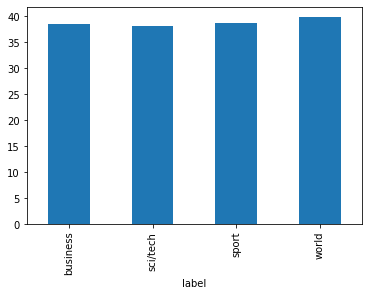

In [7]:
# TODO create a new column with the number of words for each text
import matplotlib.pyplot as plt

df["word_count"] = df["text"].apply(lambda s: len(s.split()))
df["word_count"]


# TODO plot the average number of words per label 
df.groupby("label").mean()["word_count"].plot.bar()



## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") appear in the different classes in our data

In [8]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern
    x = r'\b' + keyword + r'\b'
    pattern = re.compile(x)
    def count_keyword_frequencies(x):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(re.findall(pattern, x))
        return num_occurrences
    # Now, we can print how often a keyword appears in the data
    print (df["text"].apply(count_keyword_frequencies).sum())
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        print ("label:", label,", keyword:", keyword)
        #TODO print how often the keyword appears in this class
        print(df.loc[df["label"] == label]["text"].apply(count_keyword_frequencies).sum())
    print ("*" * 100)

1802
label: business , keyword: play
72
label: sci/tech , keyword: play
220
label: sport , keyword: play
1431
label: world , keyword: play
79
****************************************************************************************************
1148
label: business , keyword: tax
923
label: sci/tech , keyword: tax
54
label: sport , keyword: tax
13
label: world , keyword: tax
158
****************************************************************************************************
228
label: business , keyword: blackberry
44
label: sci/tech , keyword: blackberry
184
label: sport , keyword: blackberry
0
label: world , keyword: blackberry
0
****************************************************************************************************
1485
label: business , keyword: israel
17
label: sci/tech , keyword: israel
36
label: sport , keyword: israel
32
label: world , keyword: israel
1400
****************************************************************************************************


As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

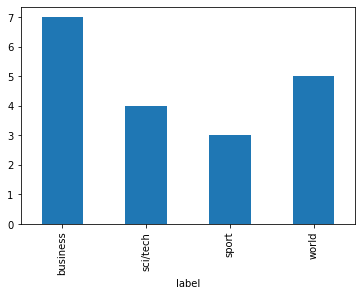

In [12]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(keyword)

def count_keyword_frequencies(x):
    #TODO implement a function which counts the total number of the word "tax" (and other fuzzy matches of tax) appearing in a given text
    num_occurrences = len(re.findall(pattern, x))
    return num_occurrences

df["counts"] = df["text"].apply(count_keyword_frequencies)
#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset
#df.groupby("label")["counts"].plot.bar()
df.groupby('label')['counts'].nunique().plot(kind='bar')
plt.show()

In [13]:
import os

os.system('jupyter nbconvert --to html homework_01.ipynb')

[NbConvertApp] Converting notebook homework_01.ipynb to html
[NbConvertApp] Writing 685795 bytes to homework_01.html


0

In [14]:
!open homework_01.html